In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # set_style

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [3]:
g = (
    df.groupby("category", as_index=False)
      .agg(
          min_price=("price", "min"),
          max_price=("price", "max"),
          avg_price=("price", "median")
      )
      .sort_values(["max_price", "avg_price"])
      .reset_index(drop=True)
)
g

,category,min_price,max_price,avg_price
0,Café furniture,145.0,1385.0,424.5
1,Children's furniture,5.0,1545.0,202.5
2,Nursery furniture,5.0,1545.0,350.0
3,Chests of drawers & drawer units,49.0,1880.0,460.0
4,"Sideboards, buffets & console tables",295.0,2100.0,965.0
5,Trolleys,39.0,2295.0,447.5
6,Bar furniture,40.0,2375.0,445.0
7,Room dividers,189.0,2397.0,725.0
8,TV & media furniture,3.0,4260.0,175.0
9,Bookcases & shelving units,3.0,4335.0,310.0


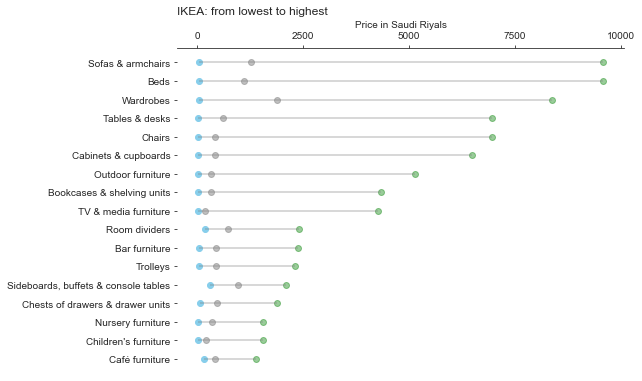

In [4]:
sns.set_style('ticks')

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

ax.hlines(y=g["category"], xmin=g['min_price'], xmax=g['max_price'], color='grey', alpha=0.4)

ax.scatter(g['min_price'], g['category'], color='skyblue', alpha=1, label='minimym')
ax.scatter(g["avg_price"], g['category'], color='grey', alpha=0.5, label="average")
ax.scatter(g['max_price'], g['category'], color='green', alpha=0.4 , label='maximum')

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 


plt.title('IKEA: from lowest to highest', loc='left')
plt.xlabel('Price in Saudi Riyals')
plt.xticks(range(0, 10000+1, 2500))
plt.savefig(f'../figures/IKEA.png', dpi = 300, bbox_inches = 'tight', pad_inches=0.3, transparent=False)
plt.show()